__**DANIEL ANGEL's Final Project Notebook for DSC530 - EDA of NBA Game Data**__

The following notebook was created to complete the Final Term Project assignment for DSC 520 : Exploratory Data Analysis at Bellevue University taught by Dr. Shankar Parajulee during the Spring 2021 term.

In [1]:
#The following code chunk contains all the necessary packages/libraries
#For the notebook to function it has to be stored in a directory containing the ThinkStats packages
#thinkstats2, thinkplot, and regression are contained within the code folder of the ThinkStats repository
#ThinkStats2 Github repository available at https://github.com/AllenDowney/ThinkStats2/tree/master/code
#Generated files will be created in the same directory as this notebook

import pandas as pd
import thinkstats2 as ts2
import thinkplot
import numpy as np
import regression
import statsmodels.formula.api as smf
import hypothesis as hyp

#Filename contains the location of my cleaned NBA csv file copy. Change to your local file location
#The second line uses pandas to read the csv file and convert to pandas dataframe
filename = r'C:\Users\Danny\thinkstats2\ThinkStats2\code\nbagames1985to2019_cleaned.csv'
df = pd.read_csv(filename, index_col=None, header=0)

In [2]:
#Observe first two lines to ensure that the correct data is loaded properly
df.head(2)

,TEAM_ABBREVIATION,GAME_DATE,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,...,STL,BLK,TOV,PF,PTS,PLUS_MINUS,OPP_PTS,REB_RATE,OPP_FG_PCT,OPP_3FG_PCT
0,ATL,1985-10-25,0,240,41,92,0.45,0,3,0.0,...,8,5,16,23,91,-9,100,0.72,0.51,0.0
1,WAS,1985-10-25,1,240,40,78,0.51,0,2,0.0,...,11,7,17,19,100,9,91,0.64,0.45,0.0


The following code saves and displays histograms for various variables in the NBA game log data set.

**Include a histogram of each of the 5 variables.(Chap.2)**

In [3]:
def HistSave(col_name, ColumnName):
    """Takes column name/variable name as string and fully
    written out column name and creates and saves a histogram of that variable."""
    thinkplot.Hist(ts2.Hist(df[col_name]))
    thinkplot.Config(xlabel='value', ylabel='frequency',title = f'Histogram of {ColumnName}')
    thinkplot.Save(root=col_name+'_hist', formats=['png'])

In [4]:
def HistDisplay(col_name, ColumnName):
    """Takes column name/variable name as string and fully
    written out column name and creates and displays a histogram of that variable."""
    thinkplot.Hist(ts2.Hist(df[col_name]))
    thinkplot.Config(xlabel='value', ylabel='frequency',title = f'Histogram of {ColumnName}')
    thinkplot.Show()

Writing DREB_hist.png


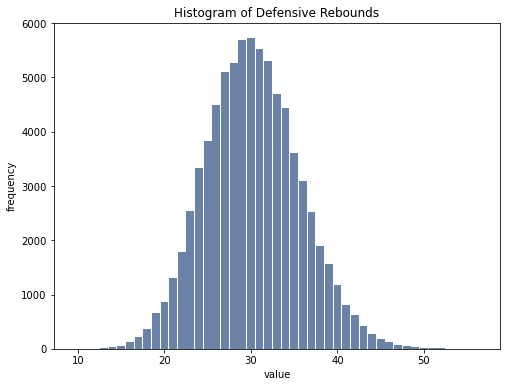

<Figure size 576x432 with 0 Axes>

In [5]:
HistSave('DREB', 'Defensive Rebounds')
HistDisplay('DREB', 'Defensive Rebounds')

Writing STL_hist.png


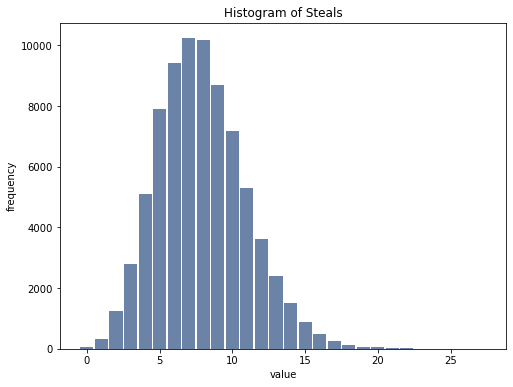

<Figure size 576x432 with 0 Axes>

In [6]:
HistSave('STL', 'Steals')
HistDisplay('STL', 'Steals')

Writing BLK_hist.png


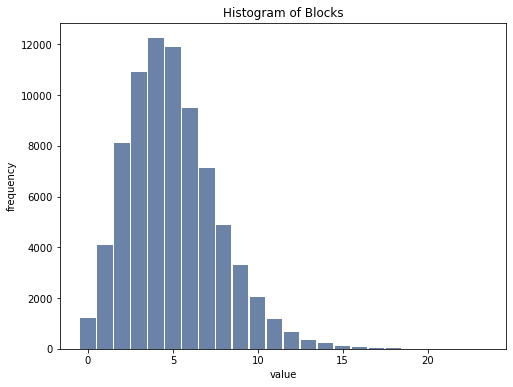

<Figure size 576x432 with 0 Axes>

In [7]:
HistSave('BLK', 'Blocks')
HistDisplay('BLK', 'Blocks')

Writing OPP_PTS_hist.png


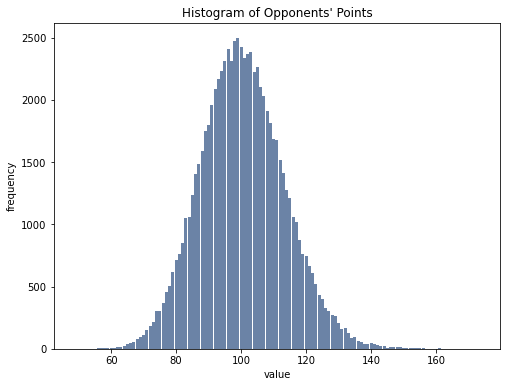

<Figure size 576x432 with 0 Axes>

In [8]:
HistSave('OPP_PTS', "Opponents' Points")
HistDisplay('OPP_PTS', "Opponents' Points")

Writing REB_RATE_hist.png


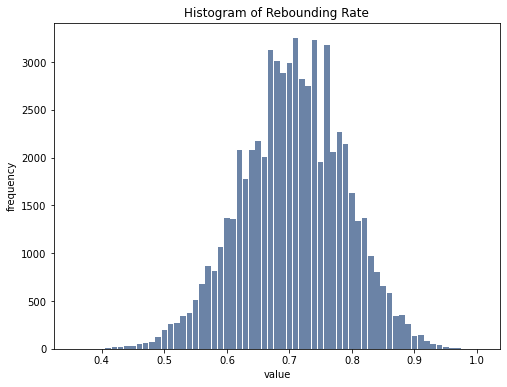

<Figure size 576x432 with 0 Axes>

In [9]:
HistSave('REB_RATE', 'Rebounding Rate')
HistDisplay('REB_RATE', 'Rebounding Rate')

Writing OPP_FG_PCT_hist.png


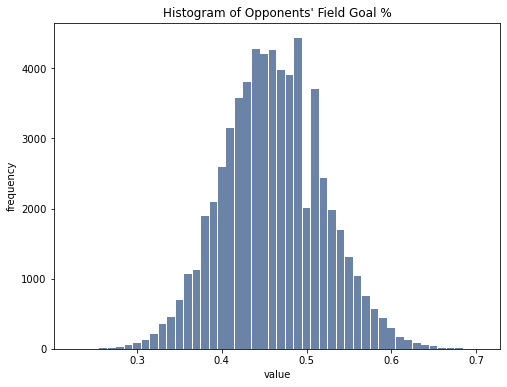

<Figure size 576x432 with 0 Axes>

In [10]:
HistSave('OPP_FG_PCT', "Opponents' Field Goal %")
HistDisplay('OPP_FG_PCT', "Opponents' Field Goal %")

Writing OPP_3FG_PCT_hist.png


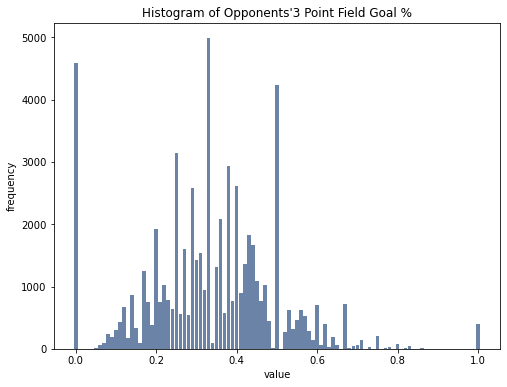

<Figure size 576x432 with 0 Axes>

In [11]:
HistSave('OPP_3FG_PCT', "Opponents' 3 Point Field Goal %")
HistDisplay('OPP_3FG_PCT', "Opponents'3 Point Field Goal %")

Writing PF_hist.png


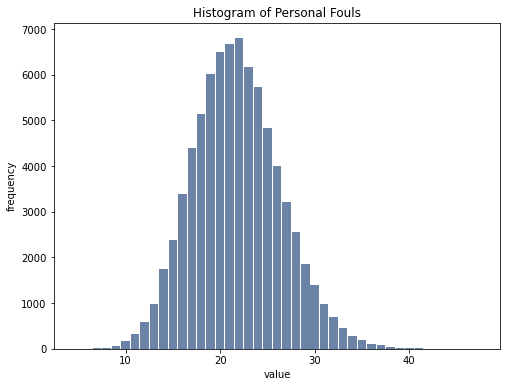

<Figure size 576x432 with 0 Axes>

In [12]:
HistSave('PF', 'Personal Fouls')
HistDisplay('PF', 'Personal Fouls')

The next few cells contain code to generate, save, and display histograms of the Wins and Losses for specified three-point field goal percentages.

In [13]:
thirdthrees = df[df['OPP_3FG_PCT'] == .5]
thinkplot.Hist(ts2.Hist(thirdthrees.WL))
thinkplot.Config(xlabel='loss vs. wins', ylabel='frequency',title = "Wins vs Losses when Opp. Hits Half of 3PTs")
thinkplot.Save(formats=['png'], root='half3s_hist')

Writing half3s_hist.png


<Figure size 576x432 with 0 Axes>

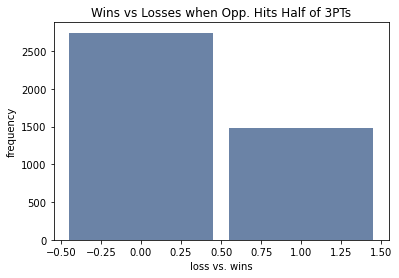

In [14]:
thirdthrees = df[df['OPP_3FG_PCT'] == .5]
thinkplot.Hist(ts2.Hist(thirdthrees.WL))
thinkplot.Config(xlabel='loss vs. wins', ylabel='frequency',title = "Wins vs Losses when Opp. Hits Half of 3PTs")

In [15]:
thirdthrees = df[df['OPP_3FG_PCT'] == .33]
thinkplot.Hist(ts2.Hist(thirdthrees.WL))
thinkplot.Config(xlabel='loss vs. wins', ylabel='frequency',title = "Wins vs Losses when Opp. Hits Third of 3PTs")
thinkplot.Save(formats=['png'], root='third3s_hist')

Writing third3s_hist.png


<Figure size 576x432 with 0 Axes>

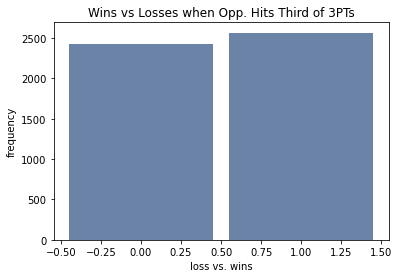

In [16]:
thirdthrees = df[df['OPP_3FG_PCT'] == .33]
thinkplot.Hist(ts2.Hist(thirdthrees.WL))
thinkplot.Config(xlabel='loss vs. wins', ylabel='frequency',title = "Wins vs Losses when Opp. Hits Third of 3PTs")

The following few cells define basic summary statistics which will be applied to some of our variables.

In [17]:
def mode(hist):
    """Takes histogram object and returns most frequent value and its frequency"""
    mode = 0
    vals = 0
    for val, freq in hist.Items():
        if freq > mode:
            mode = freq
            vals = val
        else:
            continue
    return vals, mode

In [18]:
def median(list):
    """Takes a data frame series object sorts it and returns the middle value."""
    sorted_list = sorted(list)
    return (sorted_list[38942]+sorted_list[38941])/2

In [19]:
def SummStats(col_name, ColumnName):
    """Takes column name/variable name as string and fully
    written out column name and calculates and displays 
    various summary statistics for that variable."""
    print(f"Mean of {ColumnName}")
    print(df[col_name].mean())
    print(f"Median of {ColumnName}")
    print(median(df[col_name]))
    print(f"Mode of {ColumnName}")
    print(mode(ts2.Hist(df[col_name])))
    print(f"Variance of {ColumnName}")
    print(df[col_name].var())
    print(f"Standard Deviation of {ColumnName}")
    print(df[col_name].std())

The following section contains code which calculates and displays various summary statistics for several variables.

**Include the other descriptive characteristics about the variables(Chap.2)**

In [20]:
SummStats('DREB', 'Defensive Rebounds')

Mean of Defensive Rebounds
30.23732730727749
Median of Defensive Rebounds
30.0
Mode of Defensive Rebounds
(30, 5723)
Variance of Defensive Rebounds
29.574505887706245
Standard Deviation of Defensive Rebounds
5.438244743270226


In [21]:
SummStats('STL', 'Steals')

Mean of Steals
7.908402239227569
Median of Steals
8.0
Mode of Steals
(7, 10233)
Variance of Steals
9.29808227180066
Standard Deviation of Steals
3.0492756962597953


In [22]:
SummStats('BLK', 'Blocks')

Mean of Blocks
4.9981510965024905
Median of Blocks
5.0
Mode of Blocks
(4, 12244)
Variance of Blocks
7.068419729054145
Standard Deviation of Blocks
2.6586499824260703


In [23]:
SummStats('OPP_PTS', "Opponents' Points")

Mean of Opponents' Points
100.4578989266088
Median of Opponents' Points
100.0
Mode of Opponents' Points
(99, 2495)
Variance of Opponents' Points
167.1989131207641
Standard Deviation of Opponents' Points
12.93054187266582


In [24]:
SummStats('OPP_FG_PCT', "Opponents' FG %")

Mean of Opponents' FG %
0.46046311852153793
Median of Opponents' FG %
0.48
Mode of Opponents' FG %
(0.49, 4429)
Variance of Opponents' FG %
0.003441061095158314
Standard Deviation of Opponents' FG %
0.05866055825815429


In [25]:
SummStats('OPP_3FG_PCT', "Opponents' 3PT FG %")

Mean of Opponents' 3PT FG %
0.3355082892192826
Median of Opponents' 3PT FG %
0.38
Mode of Opponents' 3PT FG %
(0.33, 4987)
Variance of Opponents' 3PT FG %
0.027611815085101157
Standard Deviation of Opponents' 3PT FG %
0.16616803268108207


In [26]:
SummStats('REB_RATE', 'Rebounding Rate')

Mean of Rebounding Rate
0.7061693663422577
Median of Rebounding Rate
0.73
Mode of Rebounding Rate
(0.71, 3250)
Variance of Rebounding Rate
0.00685511346981586
Standard Deviation of Rebounding Rate
0.08279561262419562


In [27]:
SummStats('PF', 'Personal Fouls')

Mean of Personal Fouls
21.77250783216065
Median of Personal Fouls
22.0
Mode of Personal Fouls
(22, 6800)
Variance of Personal Fouls
21.67894526110456
Standard Deviation of Personal Fouls
4.6560654270644175


In the following section Probability Mass Function plots are created and saved for various variable. For each variable, PMF_plotter is called twice, once to save the plot and once to display it.

**Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF.(Chap. 3)**

In [28]:
# This code changes WinLoss column from binary to WL
df.loc[df.WL == 0, "WL"] = 'L'
df.loc[df.WL == 1, "WL"] = 'W'
winners = df[df.WL == 'W'] #This creates a new dataframe which contains only game stats from winning teams.
losers = df[df.WL == 'L'] #This creates a new dataframe which contains only game stats from losing teams.

In [29]:
def PMF_plotter(col_name, ColumnName):
    """Takes column name/variable name as string and fully
    written out column name and creates a plot of a
    Probability Mass Function for that variable."""
    
    wins_pmf = ts2.Pmf(winners[col_name], label='Wins')
    losses_pmf = ts2.Pmf(losers[col_name], label='Losses')
    thinkplot.PrePlot(2, cols=2)
    thinkplot.Hist(wins_pmf, align='right')
    thinkplot.Hist(losses_pmf, align='left')
    thinkplot.Config(xlabel=f'{ColumnName}',ylabel='probability')
    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.Pmfs([wins_pmf, losses_pmf])
    thinkplot.config(xlabel=f'{ColumnName}')

In [30]:
PMF_plotter('DREB', 'Rebounds')
thinkplot.Save(formats=['png'], root='reb_pmf') #This saves the plot in the directory as .png filetype

Writing reb_pmf.png


<Figure size 576x432 with 0 Axes>

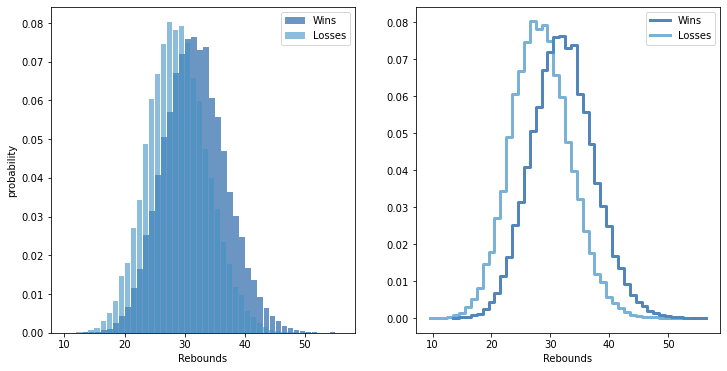

In [31]:
PMF_plotter('DREB', 'Rebounds')

In [32]:
PMF_plotter('STL', 'Steals')
thinkplot.Save(formats=['png'], root='stl_pmf')

Writing stl_pmf.png


<Figure size 576x432 with 0 Axes>

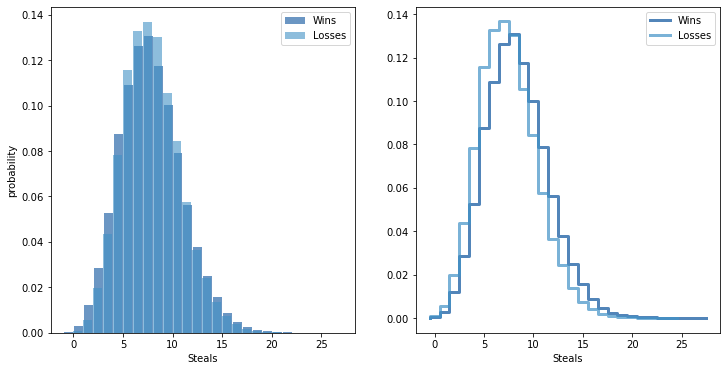

In [33]:
PMF_plotter('STL', 'Steals')

In [34]:
PMF_plotter('BLK', 'Blocks')
thinkplot.Save(formats=['png'], root='blk_pmf')

Writing blk_pmf.png


<Figure size 576x432 with 0 Axes>

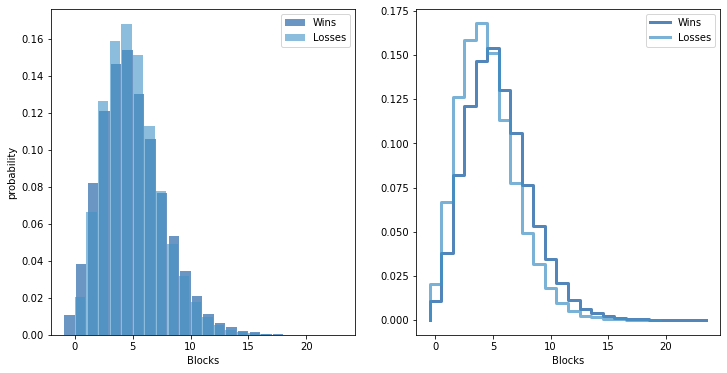

In [35]:
PMF_plotter('BLK', 'Blocks')

In [36]:
PMF_plotter('OPP_PTS', "Opponents' Points")
thinkplot.Save(formats=['png'], root='opp_pts_pmf')

Writing opp_pts_pmf.png


<Figure size 576x432 with 0 Axes>

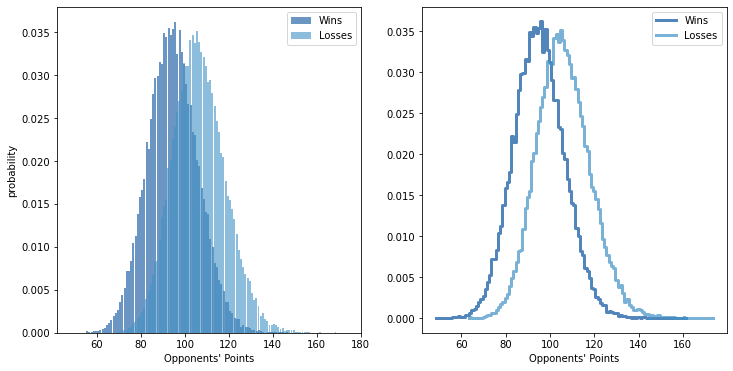

In [37]:
PMF_plotter('OPP_PTS', "Opponents' Points")

In [38]:
PMF_plotter('REB_RATE', 'Rebounding Rate')
thinkplot.Save(formats=['png'], root='reb_rate_pmf')

Writing reb_rate_pmf.png


<Figure size 576x432 with 0 Axes>

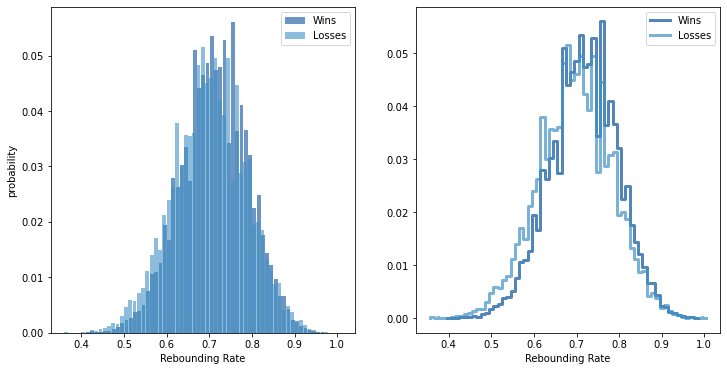

In [39]:
PMF_plotter('REB_RATE', 'Rebounding Rate')

In [40]:
PMF_plotter('PF', 'Personal Fouls')
thinkplot.Save(formats=['png'], root='pf_pmf')

Writing pf_pmf.png


<Figure size 576x432 with 0 Axes>

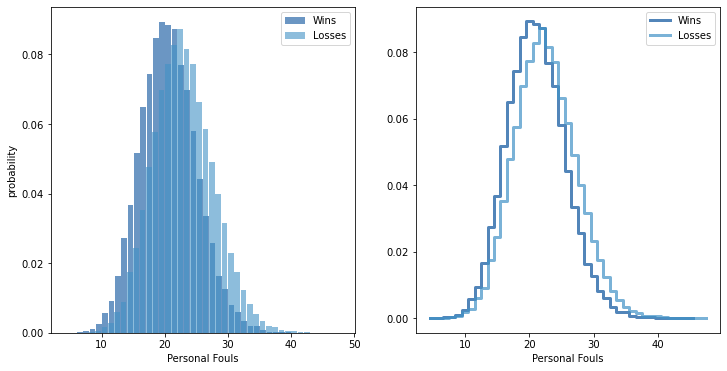

In [41]:
PMF_plotter('PF', 'Personal Fouls')

In [42]:
PMF_plotter('OPP_FG_PCT', "Opponents' FG %")
thinkplot.Save(formats=['png'], root='opp_fg_pct_pmf')

Writing opp_fg_pct_pmf.png


<Figure size 576x432 with 0 Axes>

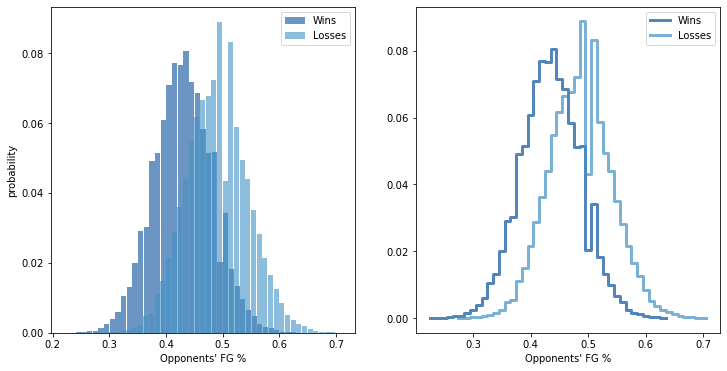

In [43]:
PMF_plotter('OPP_FG_PCT', "Opponents' FG %")

In [44]:
PMF_plotter('OPP_3FG_PCT', "Opponents' 3PT FG %")
thinkplot.Save(formats=['png'], root='opp_3fg_pct_pmf')

Writing opp_3fg_pct_pmf.png


<Figure size 576x432 with 0 Axes>

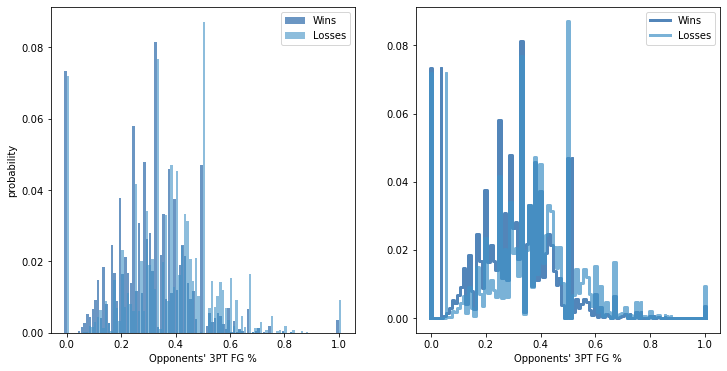

In [45]:
PMF_plotter('OPP_3FG_PCT', "Opponents' 3PT FG %")

The following section contains code which creates and save CDF plots of several variables.

**Create 1 CDF with one of your variables(Chap. 4)**

In [46]:
def CDF_plotter(col_name, ColumnName):
    """Takes column name/variable name as string and fully
    written out column name and creates a plot of a
    Cumulative Density Function for that variable."""
    
    
    win_cdf = ts2.Cdf(winners[col_name], label='Wins')
    lose_cdf = ts2.Cdf(losers[col_name], label='Losses')
    thinkplot.PrePlot(2)
    thinkplot.Cdfs([win_cdf, lose_cdf])
    thinkplot.config(xlabel=f'{ColumnName}', ylabel='CDF')

In [47]:
def CDF_saver(col_name, ColumnName):
    """Takes column name/variable name as string and fully
    written out column name and saves a plot of a
    Cumulative Density Function for that variable."""
    
    
    win_cdf = ts2.Cdf(winners[col_name], label='Wins')
    lose_cdf = ts2.Cdf(losers[col_name], label='Losses')
    thinkplot.PrePlot(2)
    thinkplot.Cdfs([win_cdf, lose_cdf])
    thinkplot.config(xlabel=f'{ColumnName}', ylabel='CDF')
    thinkplot.Save(formats=['png'], root=f'{ColumnName}_cdf')

In [48]:
CDF_saver('DREB', 'Rebounds')

Writing Rebounds_cdf.png


<Figure size 576x432 with 0 Axes>

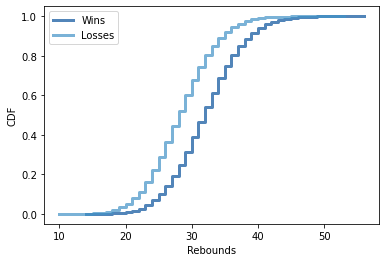

In [49]:
CDF_plotter('DREB', 'Rebounds')

In [50]:
CDF_saver('STL', 'Steals')

Writing Steals_cdf.png


<Figure size 576x432 with 0 Axes>

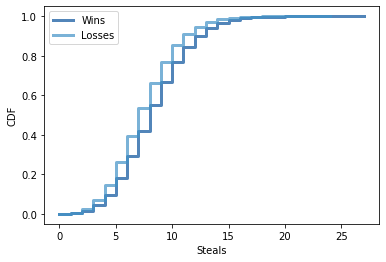

In [51]:
CDF_plotter('STL', 'Steals')

In [52]:
CDF_saver('BLK', 'Blocks')

Writing Blocks_cdf.png


<Figure size 576x432 with 0 Axes>

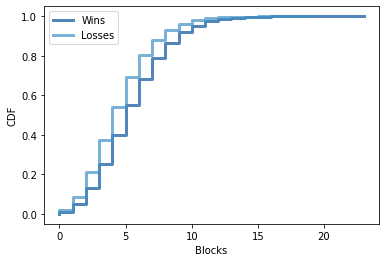

In [53]:
CDF_plotter('BLK', 'Blocks')

In [54]:
CDF_saver('OPP_PTS', "Opponents' Points")

Writing Opponents' Points_cdf.png


<Figure size 576x432 with 0 Axes>

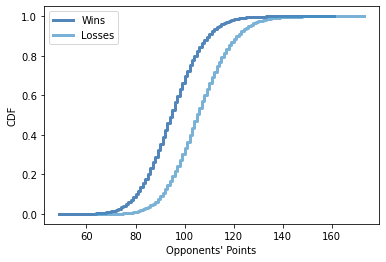

In [55]:
CDF_plotter('OPP_PTS', "Opponents' Points")

In [56]:
CDF_saver('REB_RATE', 'Rebounding Rate')

Writing Rebounding Rate_cdf.png


<Figure size 576x432 with 0 Axes>

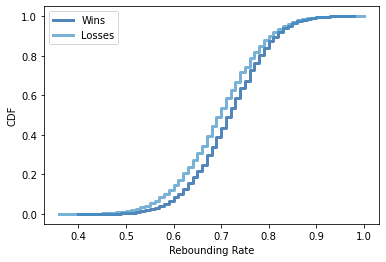

In [57]:
CDF_plotter('REB_RATE', 'Rebounding Rate')

In [58]:
CDF_saver('PF', 'Personal Fouls')

Writing Personal Fouls_cdf.png


<Figure size 576x432 with 0 Axes>

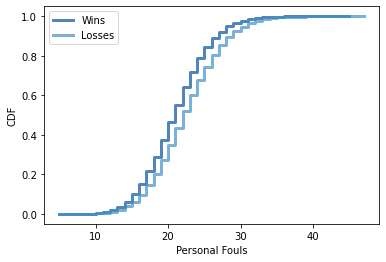

In [59]:
CDF_plotter('PF', 'Personal Fouls')

In [60]:
CDF_saver('OPP_FG_PCT', "Opponents' FG %")

Writing Opponents' FG %_cdf.png


<Figure size 576x432 with 0 Axes>

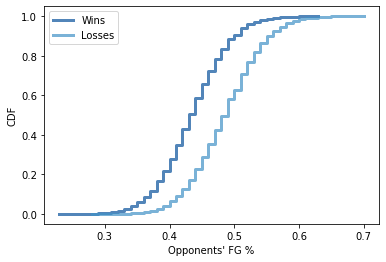

In [61]:
CDF_plotter('OPP_FG_PCT', "Opponents' FG %")

In [62]:
CDF_saver('OPP_3FG_PCT', "Opponents' 3PT FG %")

Writing Opponents' 3PT FG %_cdf.png


<Figure size 576x432 with 0 Axes>

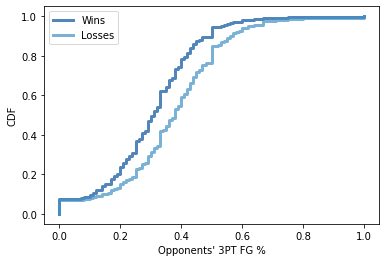

In [63]:
CDF_plotter('OPP_3FG_PCT', "Opponents' 3PT FG %")

The next few cells plot and display and save a CDF of rebounds versus various normal distribution models and then change the WinLoss column back to binary.

**Plot 1 analytical distribution(Chap. 5)**

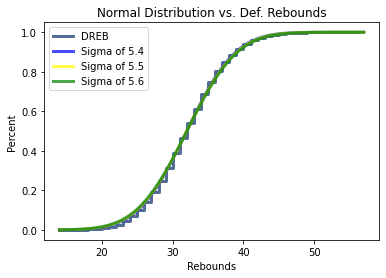

In [64]:
#Plot CDF of rebounds versus various normal models
win_reb_cdf = ts2.Cdf(winners['DREB'], label='Wins')
thinkplot.PrePlot(4)
thinkplot.Cdf(win_reb_cdf, label='DREB')
sigmas = [5.4, 5.5, 5.6]
colors = ['blue', 'yellow', 'green']
for sigma, color in zip(sigmas, colors):
    xs, ps = ts2.RenderNormalCdf(mu=32, sigma=sigma, 
                                               low=14, high=57)
    thinkplot.Plot(xs, ps, label=f'Sigma of {sigma}', color=color)
    thinkplot.config(legend=True, xlabel='Rebounds', ylabel='Percent'
                     , title='Normal Distribution vs. Def. Rebounds')


In [65]:
#Save CDF of rebounds versus various normal models
win_reb_cdf = ts2.Cdf(winners['DREB'], label='Wins')
thinkplot.PrePlot(4)
thinkplot.Cdf(win_reb_cdf, label='DREB')
sigmas = [5.4, 5.5, 5.6]
colors = ['blue', 'yellow', 'green']
for sigma, color in zip(sigmas, colors):
    xs, ps = ts2.RenderNormalCdf(mu=32, sigma=sigma, 
                                               low=14, high=57)
    thinkplot.Plot(xs, ps, label=f'Sigma of {sigma}', color=color)
    thinkplot.config(legend=True, xlabel='Rebounds', ylabel='Percent'
                     , title='Normal Distribution vs. Def. Rebounds')

thinkplot.Save(formats=['png'], root='normDistVsDrebs')

Writing normDistVsDrebs.png


<Figure size 576x432 with 0 Axes>

The next section creates a scatter plot of various variable against points and again against plus/minus scores.

**Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis(Chapter 7)**

In [66]:
def Scatter_plotter(col_name, ColumnName):
    """Takes column name/variable name as string and fully
    written out column name and creates a scatter plot of that variable versus points.
    Also, displays covariance and correlation scores."""
    
    thinkplot.PrePlot(2, cols=2)
    thinkplot.Scatter(df[col_name],df.PTS, alpha = .1)
    thinkplot.config(title=f'Scatter Plot of {ColumnName} vs Pts', xlabel=f'{ColumnName}',ylabel='Points')
    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.HexBin(df[col_name],df.PTS)
    thinkplot.config(title=f'HexBin Plot of {ColumnName} vs Pts',xlabel=f'{ColumnName}',ylabel='Points')
    print(f'Covariance of {ColumnName} and Points')
    print(ts2.Cov(df[col_name],df.PTS))
    print(f"Pearson's Correlation of {ColumnName} and Points")
    print(ts2.Corr(df[col_name],df.PTS))
    print(f"Spearman's Rank Correlation of {ColumnName} and Points")
    print(ts2.SpearmanCorr(df[col_name],df.PTS))

In [67]:
def Scatter_plotter_vsPlusMinus(col_name, ColumnName):
    """Takes column name/variable name as string and fully
    written out column name and creates a scatter plot of that variable versus plus/minus.
    Also, displays covariance and correlation scores."""
    
    thinkplot.PrePlot(2, cols=2)
    thinkplot.Scatter(df[col_name],df.PLUS_MINUS, alpha = .1)
    thinkplot.config(title=f'Scatter Plot of {ColumnName} vs PLUS_MINUS', xlabel=f'{ColumnName}',ylabel='Points')
    thinkplot.PrePlot(2)
    thinkplot.SubPlot(2)
    thinkplot.HexBin(df[col_name],df.PLUS_MINUS)
    thinkplot.config(title=f'HexBin Plot of {ColumnName} vs PLUS_MINUS',xlabel=f'{ColumnName}',ylabel='Points')
    print(f'Covariance of {ColumnName} and PLUS_MINUS')
    print(ts2.Cov(df[col_name],df.PLUS_MINUS))
    print(f"Pearson's Correlation of {ColumnName} and PLUS_MINUS")
    print(ts2.Corr(df[col_name],df.PLUS_MINUS))
    print(f"Spearman's Rank Correlation of {ColumnName} and PLUS_MINUS")
    print(ts2.SpearmanCorr(df[col_name],df.PLUS_MINUS))

Covariance of Defensive Rebounds and PLUS_MINUS
30.431552051769287
Pearson's Correlation of Defensive Rebounds and PLUS_MINUS
0.4117250539381814
Spearman's Rank Correlation of Defensive Rebounds and PLUS_MINUS
0.402408011546459


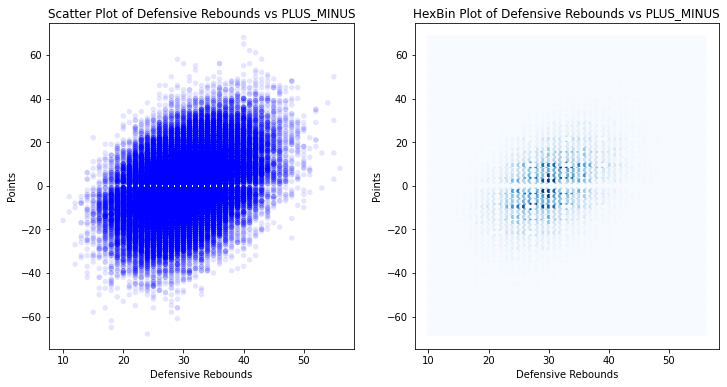

In [68]:
Scatter_plotter_vsPlusMinus('DREB', 'Defensive Rebounds')

Covariance of Defensive Rebounds and Points
10.725440350271722
Pearson's Correlation of Defensive Rebounds and Points
0.1525304578919849
Spearman's Rank Correlation of Defensive Rebounds and Points
0.13694065077632453


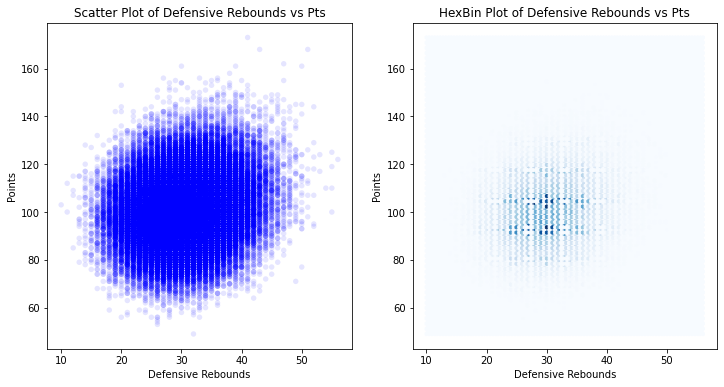

In [69]:
Scatter_plotter('DREB', 'Defensive Rebounds')

Covariance of Steals and PLUS_MINUS
7.350855117867598
Pearson's Correlation of Steals and PLUS_MINUS
0.17737120319298905
Spearman's Rank Correlation of Steals and PLUS_MINUS
0.16467896076505495


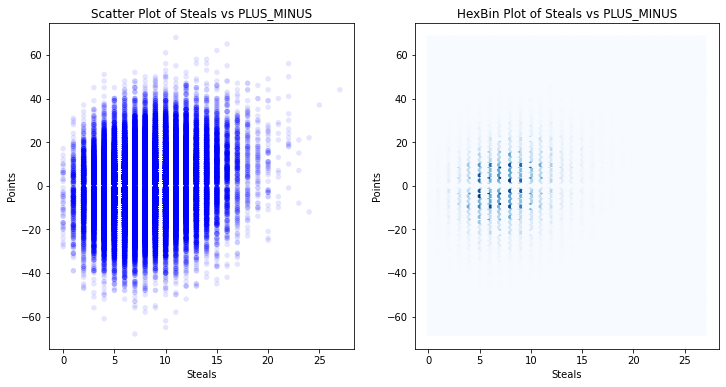

In [70]:
Scatter_plotter_vsPlusMinus('STL', 'Steals')

Covariance of Steals and Points
5.669606734918943
Pearson's Correlation of Steals and Points
0.1437991881616317
Spearman's Rank Correlation of Steals and Points
0.13007056818405285


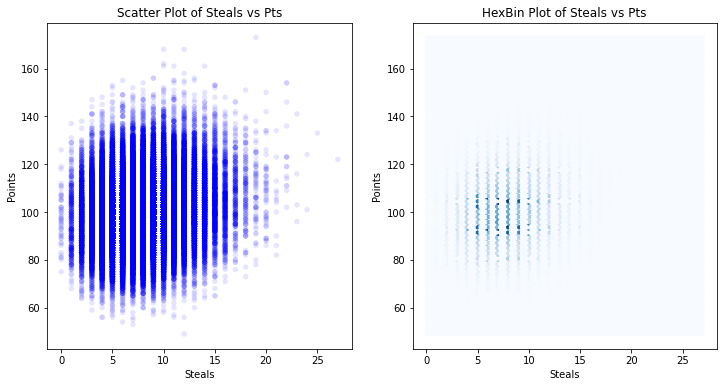

In [71]:
Scatter_plotter('STL', 'Steals')

Covariance of Blocks and PLUS_MINUS
6.7904576036156366
Pearson's Correlation of Blocks and PLUS_MINUS
0.18792294860502753
Spearman's Rank Correlation of Blocks and PLUS_MINUS
0.18768818763208983


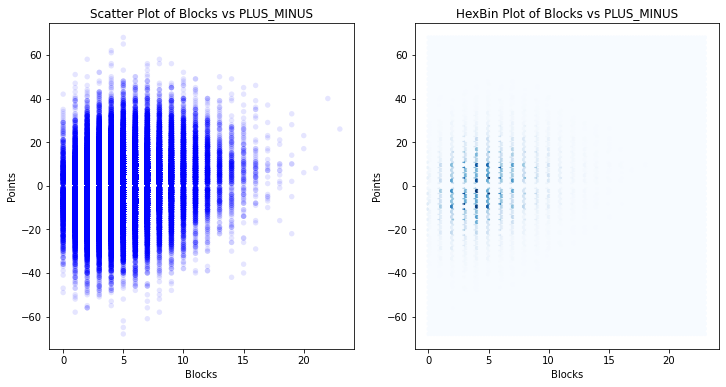

In [72]:
Scatter_plotter_vsPlusMinus('BLK', 'Blocks')

Covariance of Blocks and Points
2.396524799001491
Pearson's Correlation of Blocks and Points
0.06971415264729003
Spearman's Rank Correlation of Blocks and Points
0.06338336797116641


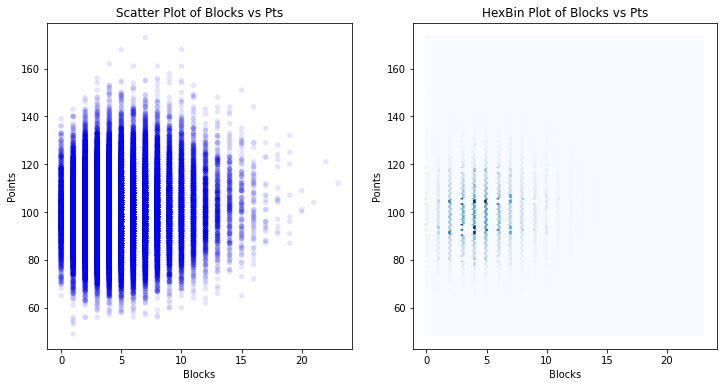

In [73]:
Scatter_plotter('BLK', 'Blocks')

Covariance of Opponents' Points and PLUS_MINUS
-92.36601869446868
Pearson's Correlation of Opponents' Points and PLUS_MINUS
-0.5255783179664746
Spearman's Rank Correlation of Opponents' Points and PLUS_MINUS
-0.5064211126470166


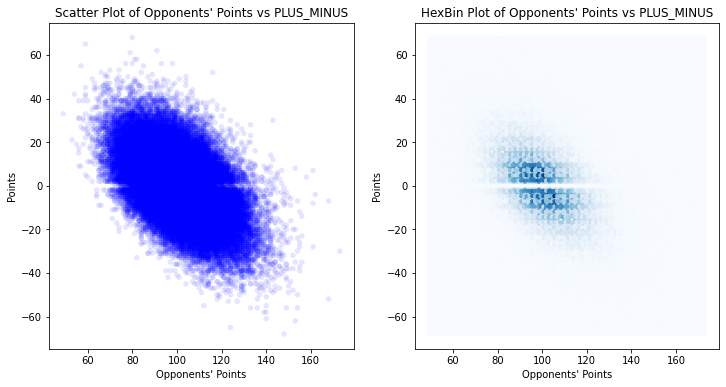

In [74]:
Scatter_plotter_vsPlusMinus('OPP_PTS', "Opponents' Points")

Covariance of Opponents' Points and Points
74.83074765780377
Pearson's Correlation of Opponents' Points and Points
0.44757266052108385
Spearman's Rank Correlation of Opponents' Points and Points
0.4323788526980578


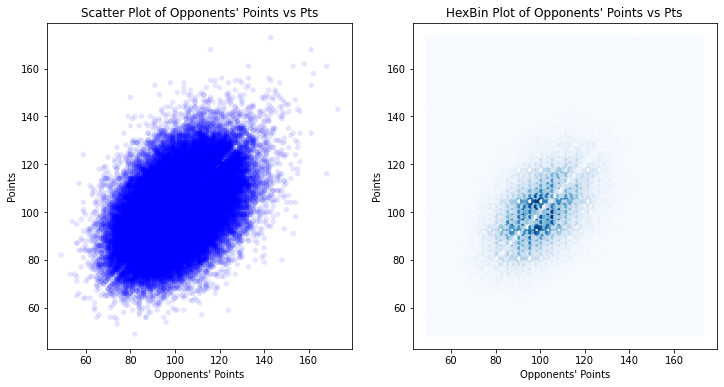

In [75]:
Scatter_plotter('OPP_PTS', "Opponents' Points")

Covariance of Personal Fouls and PLUS_MINUS
-6.793076883570435
Pearson's Correlation of Personal Fouls and PLUS_MINUS
-0.10734687270551996
Spearman's Rank Correlation of Personal Fouls and PLUS_MINUS
-0.11423704163814553


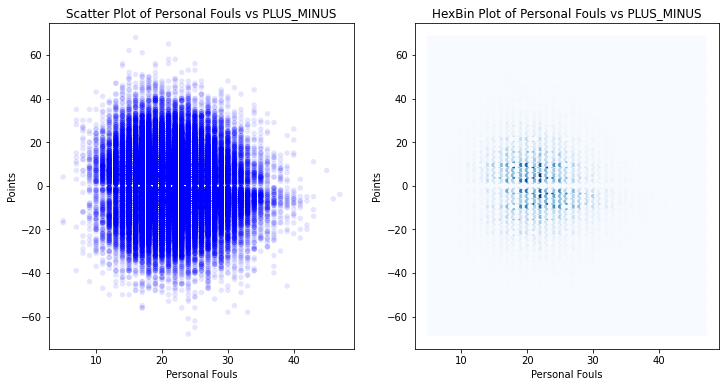

In [76]:
Scatter_plotter_vsPlusMinus('PF', 'Personal Fouls')

Covariance of Personal Fouls and Points
7.190668856012236
Pearson's Correlation of Personal Fouls and Points
0.11944016799757828
Spearman's Rank Correlation of Personal Fouls and Points
0.11030111124184448


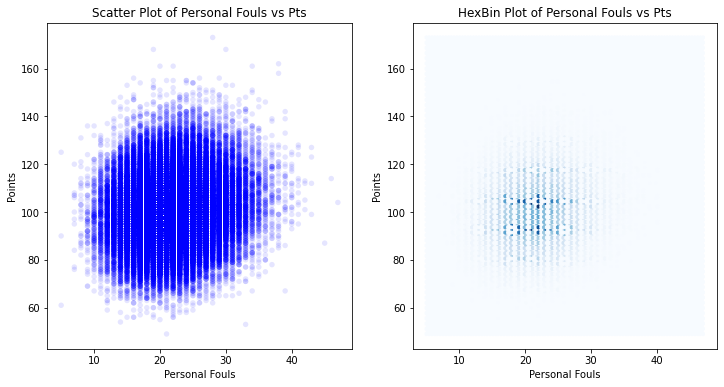

In [77]:
Scatter_plotter('PF', 'Personal Fouls')

Covariance of Opponents' FG % and PLUS_MINUS
nan
Pearson's Correlation of Opponents' FG % and PLUS_MINUS
nan
Spearman's Rank Correlation of Opponents' FG % and PLUS_MINUS
nan


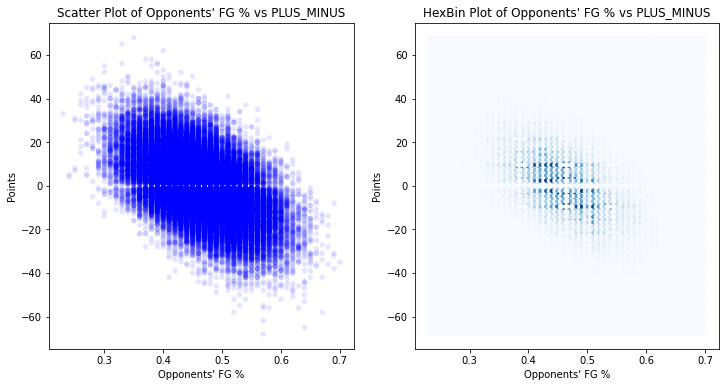

In [78]:
Scatter_plotter_vsPlusMinus('OPP_FG_PCT', "Opponents' FG %")

Covariance of Opponents' FG % and Points
nan
Pearson's Correlation of Opponents' FG % and Points
nan
Spearman's Rank Correlation of Opponents' FG % and Points
nan


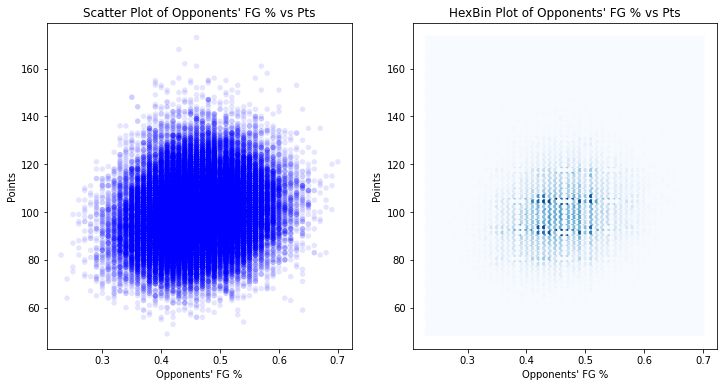

In [79]:
Scatter_plotter('OPP_FG_PCT', "Opponents' FG %")

Covariance of Opponents' 3PT FG % and PLUS_MINUS
nan
Pearson's Correlation of Opponents' 3PT FG % and PLUS_MINUS
nan
Spearman's Rank Correlation of Opponents' 3PT FG % and PLUS_MINUS
nan


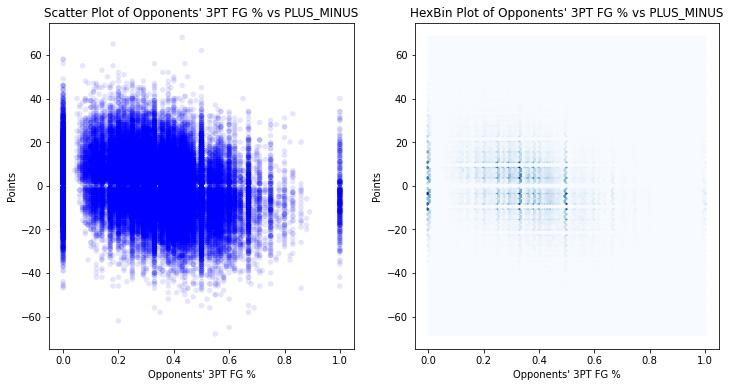

In [80]:
Scatter_plotter_vsPlusMinus('OPP_3FG_PCT', "Opponents' 3PT FG %")

Covariance of Opponents' 3PT FG % and Points
nan
Pearson's Correlation of Opponents' 3PT FG % and Points
nan
Spearman's Rank Correlation of Opponents' 3PT FG % and Points
nan


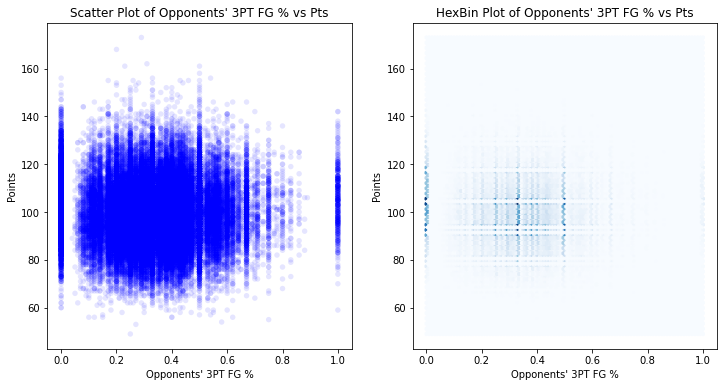

In [81]:
Scatter_plotter('OPP_3FG_PCT', "Opponents' 3PT FG %")

Covariance of Rebounding Rate and PLUS_MINUS
nan
Pearson's Correlation of Rebounding Rate and PLUS_MINUS
nan
Spearman's Rank Correlation of Rebounding Rate and PLUS_MINUS
nan


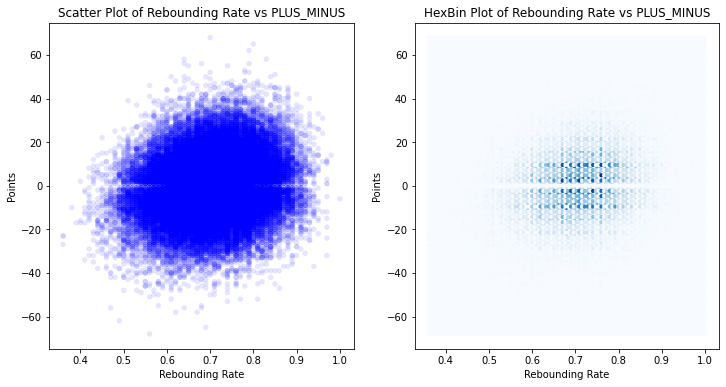

In [82]:
Scatter_plotter_vsPlusMinus('REB_RATE', "Rebounding Rate")

Covariance of Rebounding Rate and Points
nan
Pearson's Correlation of Rebounding Rate and Points
nan
Spearman's Rank Correlation of Rebounding Rate and Points
nan


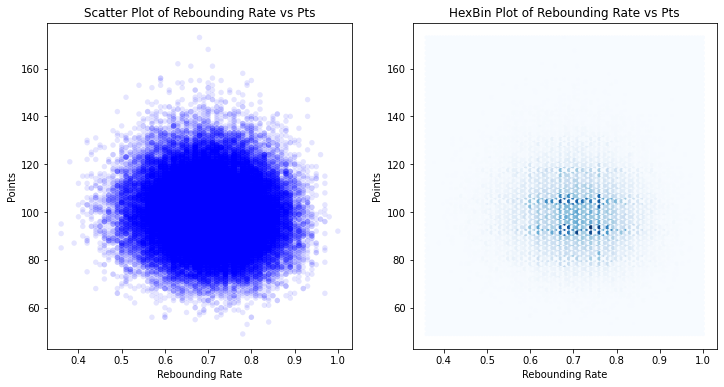

In [83]:
Scatter_plotter('REB_RATE', "Rebounding Rate")

In the next section I perform hypothesis testing. I formulated a null hypothesis which is that the defensive statistics will not have an outcome on the game. I chose two test statistics, difference of means and standard deviation. I tested my hypotheses using a two-sided permutation test.

**Conduct a test on your hypothesis using one of the methods covered in Chapter 9.**

In [84]:
df.loc[df.WL == 0, "WL"] = 'L'
df.loc[df.WL == 1, "WL"] = 'W'
winners = df[df.WL == 'W'] #This creates a new dataframe which contains only game stats from winning teams.
losers = df[df.WL == 'L'] #This creates a new dataframe which contains only game stats from losing teams.


means permute two-sided
p-value = 0.0
actual = 0.9154126649889571
ts max = 0.052436957526578176


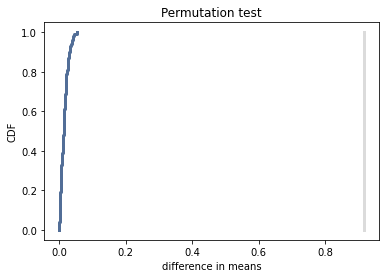

In [85]:
#Hypothesis test for difference in means of blocks
data = winners.BLK.values, losers.BLK.values
ht = hyp.DiffMeansPermute(data)
p_value = ht.PValue(iters=100)
print('\nmeans permute two-sided')
hyp.PrintTest(p_value, ht)

ht.PlotCdf()
thinkplot.Config(title='Permutation test', xlabel='difference in means', ylabel='CDF',
                legend=False)

In [86]:
#Saving hypothesis test for difference in means of blocks
data = winners.BLK.values, losers.BLK.values
ht = hyp.DiffMeansPermute(data)
p_value = ht.PValue(iters=100)
ht.PlotCdf()
thinkplot.Save(formats = ['png'], root='hypothesis1', title='Permutation test', xlabel='difference in means (weeks)', ylabel='CDF',
                legend=False)

Writing hypothesis1.png


<Figure size 576x432 with 0 Axes>


means permute two-sided
p-value = 0.0
actual = 0.8792049714960708
ts max = 0.06065430640439651


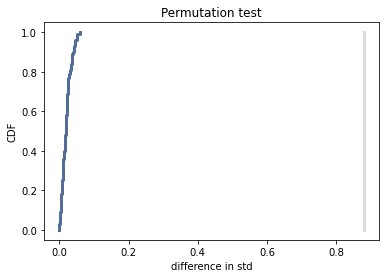

In [87]:
#Hypothesis test for difference in means of steals
data = winners.STL.values, losers.STL.values
ht = hyp.DiffMeansPermute(data)
p_value = ht.PValue(iters=100)
print('\nmeans permute two-sided')
hyp.PrintTest(p_value, ht)

ht.PlotCdf()
thinkplot.Config(title='Permutation test', xlabel='difference in std', ylabel='CDF',
                legend=False)

In [88]:
#Saving hypothesis test for difference in means of steals
data = winners.STL.values, losers.STL.values
ht = hyp.DiffMeansPermute(data)
p_value = ht.PValue(iters=100)
ht.PlotCdf()
thinkplot.Save(formats = ['png'], root='hypothesis2', title='Permutation test', xlabel='difference in means', ylabel='CDF',
                legend=False)

Writing hypothesis2.png


<Figure size 576x432 with 0 Axes>


means permute two-sided
p-value = 0.0
actual = 3.7525037234862104
ts max = 0.11396435724924459


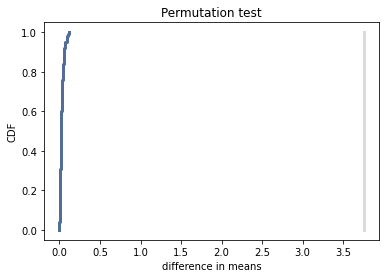

In [89]:
#Hypothesis test for difference in means of rebounds
data = winners.DREB.values, losers.DREB.values
ht = hyp.DiffMeansPermute(data)
p_value = ht.PValue(iters=100)
print('\nmeans permute two-sided')
hyp.PrintTest(p_value, ht)

ht.PlotCdf()
thinkplot.Config(title='Permutation test', xlabel='difference in means', ylabel='CDF',
                legend=False)

In [90]:
#Saving hypothesis test for difference in means of rebounds
data = winners.DREB.values, losers.DREB.values
ht = hyp.DiffMeansPermute(data)
p_value = ht.PValue(iters=100)
ht.PlotCdf()
thinkplot.Save(formats = ['png'], root='hypothesis3', title='Permutation test', xlabel='difference in means', ylabel='CDF',
                legend=False)

Writing hypothesis3.png


<Figure size 576x432 with 0 Axes>


std permute one-sided
p-value = 0.0
actual = 0.25991725376166386
ts max = 0.0687999779596078


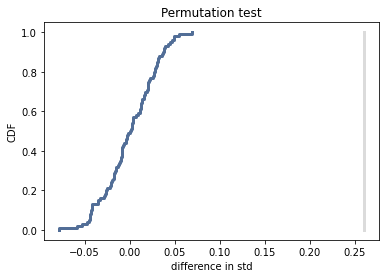

In [91]:
#Hypothesis test for difference in standard deviations of rebounds
data = winners.DREB.values, losers.DREB.values
ht = hyp.DiffStdPermute(data)
p_value = ht.PValue(iters=100)
print('\nstd permute one-sided')
hyp.PrintTest(p_value, ht)
ht.PlotCdf()
thinkplot.Config(title='Permutation test', xlabel='difference in std', ylabel='CDF',
                legend=False)

In [92]:
#Saving hypothesis test for difference in standard deviations of rebounds
data = winners.DREB.values, losers.DREB.values
ht = hyp.DiffStdPermute(data)
p_value = ht.PValue(iters=100)
ht.PlotCdf()
thinkplot.Save(formats = ['png'], root='hypothesis4', title='Permutation test', xlabel='difference in std', ylabel='CDF',
                legend=False)

Writing hypothesis4.png


<Figure size 576x432 with 0 Axes>


std permute one-sided
p-value = 0.0
actual = 0.27422471676206195
ts max = 0.030129712549123777


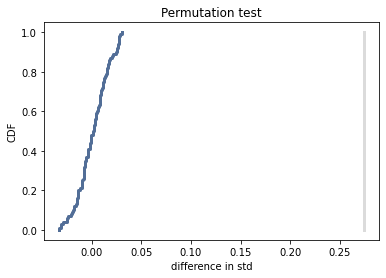

In [93]:
#Hypothesis test for difference in standard deviations of blocks
data = winners.BLK.values, losers.BLK.values
ht = hyp.DiffStdPermute(data)
p_value = ht.PValue(iters=100)
print('\nstd permute one-sided')
hyp.PrintTest(p_value, ht)
ht.PlotCdf()
thinkplot.Config(title='Permutation test', xlabel='difference in std', ylabel='CDF',
                legend=False)

In [94]:
#Saving hypothesis test for difference in standard deviations of blocks
data = winners.BLK.values, losers.BLK.values
ht = hyp.DiffStdPermute(data)
p_value = ht.PValue(iters=100)
ht.PlotCdf()
thinkplot.Save(formats = ['png'], root='hypothesis5', title='Permutation test', xlabel='difference in std', ylabel='CDF',
                legend=False)

Writing hypothesis5.png


<Figure size 576x432 with 0 Axes>


std permute one-sided
p-value = 0.0
actual = 0.22414875963415382
ts max = 0.04084417274045782


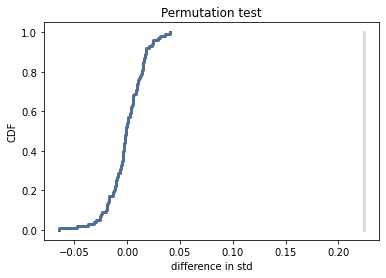

In [95]:
#Hypothesis test for difference in standard deviations of steals
data = winners.STL.values, losers.STL.values
ht = hyp.DiffStdPermute(data)
p_value = ht.PValue(iters=100)
print('\nstd permute one-sided')
hyp.PrintTest(p_value, ht)
ht.PlotCdf()
thinkplot.Config(title='Permutation test', xlabel='difference in std', ylabel='CDF',
                legend=False)

In [96]:
#Saving hypothesis test for difference in standard deviations of steals
data = winners.STL.values, losers.STL.values
ht = hyp.DiffStdPermute(data)
p_value = ht.PValue(iters=100)
ht.PlotCdf()
thinkplot.Save(formats = ['png'], root='hypothesis6', title='Permutation test', xlabel='difference in std', ylabel='CDF',
                legend=False)

Writing hypothesis6.png


<Figure size 576x432 with 0 Axes>

The following section creates linear regression fit models and plots them against the variable's scatter plot.

**For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables(Chapter 10 & 11).**

In [97]:
def ScatterFit(col_name, ColumnName):
    """Takes column name/variable name as string and fully written out column name
    and generates a linear regression fit model overlayed on a scatter plot of that 
    variable versus plus/minus and displays it."""
    
    inter, slope = ts2.LeastSquares(df[col_name], df.PLUS_MINUS)
    fit_xs, fit_ys = ts2.FitLine(df[col_name], inter, slope)
    thinkplot.Scatter(df[col_name], df.PLUS_MINUS, color='gray', alpha=0.1)
    thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
    thinkplot.Plot(fit_xs, fit_ys, color='blue', linewidth=2)
    thinkplot.config(title=f'Linear Fit of Regression for {ColumnName} vs. PlusMinus'
                    , xlabel=f'{ColumnName}', ylabel='PlusMinus')

In [98]:
def ScatterFitSave(col_name, ColumnName):
    """Takes column name/variable name as string and fully written out column name
    and generates a linear regression fit model overlayed on a scatter plot of that 
    variable versus plus/minus and saves it."""
    
    inter, slope = ts2.LeastSquares(df[col_name], df.PLUS_MINUS)
    fit_xs, fit_ys = ts2.FitLine(df[col_name], inter, slope)
    thinkplot.Scatter(df[col_name], df.PLUS_MINUS, color='gray', alpha=0.1)
    thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
    thinkplot.Plot(fit_xs, fit_ys, color='blue', linewidth=2)
    thinkplot.config(title=f'Linear Fit of Regression for {ColumnName} vs. PlusMinus'
                    , xlabel=f'{ColumnName}', ylabel='PlusMinus')
    thinkplot.Save(formats=['png'], root=f'fitmodel_{col_name}')

In [99]:
ScatterFitSave('DREB', 'Defensive Rebounds')

Writing fitmodel_DREB.png


<Figure size 576x432 with 0 Axes>

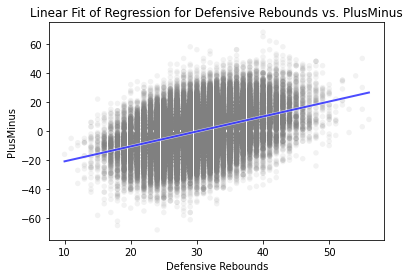

In [100]:
ScatterFit('DREB', 'Defensive Rebounds')

In [101]:
ScatterFitSave('STL', 'Steals')

Writing fitmodel_STL.png


<Figure size 576x432 with 0 Axes>

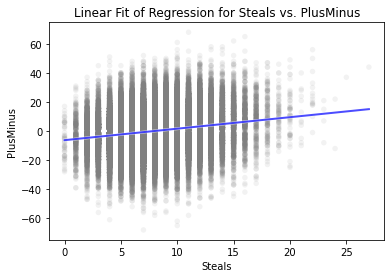

In [102]:
ScatterFit('STL', 'Steals')

In [103]:
ScatterFitSave('BLK', 'Blocks')

Writing fitmodel_BLK.png


<Figure size 576x432 with 0 Axes>

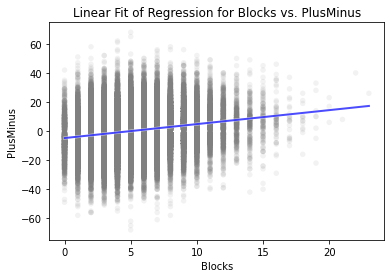

In [104]:
ScatterFit('BLK', 'Blocks')

In [105]:
ScatterFitSave('OPP_PTS', "Opponents' Points")

Writing fitmodel_OPP_PTS.png


<Figure size 576x432 with 0 Axes>

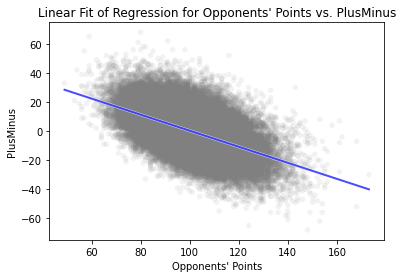

In [106]:
ScatterFit('OPP_PTS', "Opponents' Points")

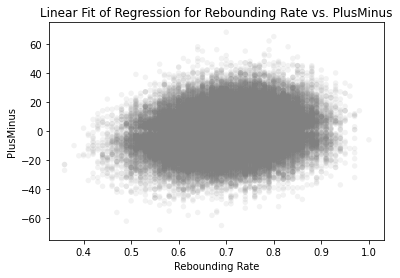

In [107]:
ScatterFit('REB_RATE', 'Rebounding Rate')

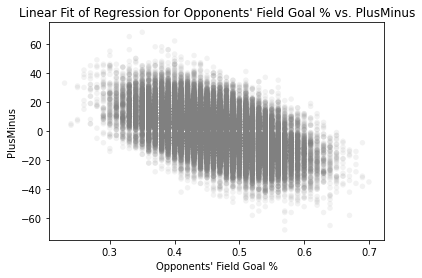

In [108]:
ScatterFit('OPP_FG_PCT', "Opponents' Field Goal %")

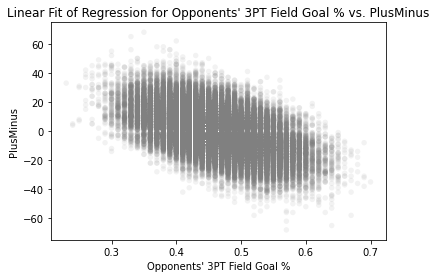

In [109]:
ScatterFit('OPP_FG_PCT', "Opponents' 3PT Field Goal %")

The following section uses logistic regression and multiple regression to try to find the best model of the data for a given variable. Remember, because logistic regression is used R^2 scores are really Pseudo-R^2 scores

**For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables(Chapter 10 & 11).**

In [110]:
#Was having issues with WL column so I just reloaded the data frame
filename = r'C:\Users\Danny\thinkstats2\ThinkStats2\code\nbagames1985to2019_cleaned.csv'
df = pd.read_csv(filename, index_col=None, header=0)

In [111]:
def LogModRes1Var(col_name, sign=str):
    """Takes column name/variable name as string and fully written out column name
    and calculates a logistic model of that variable versus Win/Loss and displays it.
    Accuracy of the model and the Minimum/Maximum value for improving win chances
    above 50%. Sign is either 'pos' or 'neg' depending on the correlation."""
    
    if sign == 'pos':
        max_or_min = 'Minimum'
    else:
        max_or_min = 'Maximum'
    patsy = 'WL ~ '+ col_name
    model = smf.logit(patsy, data=df)
    results = model.fit()
    regression.SummarizeResults(results)
    endog = pd.DataFrame(model.endog, columns=[model.endog_names])
    actual = endog['WL']
    predict = (results.predict() >= 0.5)
    true_pos = predict * actual
    true_neg = (1 - predict) * (1 - actual)
    acc = (sum(true_pos) + sum(true_neg)) / len(actual)
    print(f'Accuracy of Model at Predicting Wins is {round(acc,3)}')
    soln = round((.5 - results.params['Intercept'])/results.params[col_name])
    print(f'{max_or_min} Number of {col_name} to Increase Win Chance above 50% is {soln}')

In [112]:
def LogModRes1VarNoRound(col_name, sign=str):
    """Same as LogModRes1Var except this can be applied to rates such as
    rebounding rate, field goal percentage, and 3 pt field goal percentage."""
    
    if sign == 'pos':
        max_or_min = 'Minimum'
    else:
        max_or_min = 'Maximum'
    patsy = 'WL ~ '+ col_name
    model = smf.logit(patsy, data=df)
    results = model.fit()
    regression.SummarizeResults(results)
    endog = pd.DataFrame(model.endog, columns=[model.endog_names])
    actual = endog['WL']
    predict = (results.predict() >= 0.5)
    true_pos = predict * actual
    true_neg = (1 - predict) * (1 - actual)
    acc = (sum(true_pos) + sum(true_neg)) / len(actual)
    print(f'Accuracy of Model at Predicting Wins is {round(acc,3)}')
    soln = round((.5 - results.params['Intercept'])/results.params[col_name],3)
    print(f'{max_or_min} Number of {col_name} to Increase Win Chance above 50% is {soln}')

In [113]:
def LogModRes(patsy):
    """Same as LogModRes1Var except this can be applied to multiple regression models."""
    model = smf.logit(patsy, data=df)
    results = model.fit()
    regression.SummarizeResults(results)
    endog = pd.DataFrame(model.endog, columns=[model.endog_names])
    actual = endog['WL']
    predict = (results.predict() >= 0.5)
    true_pos = predict * actual
    true_neg = (1 - predict) * (1 - actual)
    acc = (sum(true_pos) + sum(true_neg)) / len(actual)
    print(f'Accuracy of Model at Predicting Wins is {round(acc,3)}')

In [114]:
LogModRes1Var('STL', 'pos')

Optimization terminated successfully.
         Current function value: 0.682634
         Iterations 4
Intercept   -0.764   (1.32e-304)
STL   0.0968   (0)
R^2 0.01517
Accuracy of Model at Predicting Wins is 0.557
Minimum Number of STL to Increase Win Chance above 50% is 13


In [115]:
LogModRes1Var('BLK', 'pos')

Optimization terminated successfully.
         Current function value: 0.678049
         Iterations 4
Intercept   -0.669   (0)
BLK   0.134   (0)
R^2 0.02178
Accuracy of Model at Predicting Wins is 0.571
Minimum Number of BLK to Increase Win Chance above 50% is 9


In [116]:
LogModRes1Var('DREB', 'pos')

Optimization terminated successfully.
         Current function value: 0.629718
         Iterations 5
Intercept   -4.36   (0)
DREB   0.144   (0)
R^2 0.09151
Accuracy of Model at Predicting Wins is 0.644
Minimum Number of DREB to Increase Win Chance above 50% is 34


In [117]:
LogModRes1VarNoRound('REB_RATE', 'pos')

Optimization terminated successfully.
         Current function value: 0.685551
         Iterations 4
Intercept   -2.13   (3.8e-203)
REB_RATE   3.01   (6.82e-206)
R^2 0.01096
Accuracy of Model at Predicting Wins is 0.55
Minimum Number of REB_RATE to Increase Win Chance above 50% is 0.872


In [118]:
LogModRes1Var('OPP_PTS', 'neg')

Optimization terminated successfully.
         Current function value: 0.592909
         Iterations 6
Intercept   8.15   (0)
OPP_PTS   -0.0812   (0)
R^2 0.1446
Accuracy of Model at Predicting Wins is 0.68
Maximum Number of OPP_PTS to Increase Win Chance above 50% is 94


In [119]:
LogModRes1VarNoRound('OPP_FG_PCT', 'neg')

Optimization terminated successfully.
         Current function value: 0.587124
         Iterations 6
Intercept   8.5   (0)
OPP_FG_PCT   -18.5   (0)
R^2 0.153
Accuracy of Model at Predicting Wins is 0.685
Maximum Number of OPP_FG_PCT to Increase Win Chance above 50% is 0.433


In [120]:
LogModRes1VarNoRound('OPP_3FG_PCT', 'neg')

Optimization terminated successfully.
         Current function value: 0.672784
         Iterations 5
Intercept   0.848   (0)
OPP_3FG_PCT   -2.53   (0)
R^2 0.02938
Accuracy of Model at Predicting Wins is 0.6
Maximum Number of OPP_3FG_PCT to Increase Win Chance above 50% is 0.138


In [121]:
LogModRes('WL ~ DREB + STL + BLK + REB_RATE')

Optimization terminated successfully.
         Current function value: 0.593548
         Iterations 6
Intercept   -6.53   (0)
DREB   0.182   (0)
STL   0.162   (0)
BLK   0.0775   (7.07e-107)
REB_RATE   -0.721   (9.97e-09)
R^2 0.1437
Accuracy of Model at Predicting Wins is 0.68


In [122]:
LogModRes('WL ~ DREB + STL + BLK')

Optimization terminated successfully.
         Current function value: 0.600306
         Iterations 5
Intercept   -6.5   (0)
DREB   0.159   (0)
STL   0.159   (0)
BLK   0.0908   (1.09e-190)
R^2 0.1339
Accuracy of Model at Predicting Wins is 0.675


In [123]:
LogModRes('WL ~+ STL + BLK + REB_RATE')

Optimization terminated successfully.
         Current function value: 0.652883
         Iterations 5
Intercept   -4.78   (0)
STL   0.117   (0)
BLK   0.154   (0)
REB_RATE   4.36   (0)
R^2 0.05809
Accuracy of Model at Predicting Wins is 0.614


In [124]:
LogModRes('WL ~ OPP_FG_PCT +OPP_3FG_PCT+ OPP_PTS')

Optimization terminated successfully.
         Current function value: 0.565874
         Iterations 6
Intercept   10.2   (0)
OPP_FG_PCT   -11.2   (0)
OPP_3FG_PCT   -1.34   (2.45e-119)
OPP_PTS   -0.0462   (0)
R^2 0.1836
Accuracy of Model at Predicting Wins is 0.702
